# <span style="color:blue">  Esercitazione 1</span>

## Esercizio 1.1

Nel seguente esercizio si generano numeri pseudo-casuali nell'intervallo $[0,1)$ e se ne stima il valore medio con la relativa incertezza statistica. Per fare ciò, si utilizza il metodo delle medie blocchi.

Si generano $M=10^5$ numeri pseudo-casuali e li si organizzano in $N=10^2$ blocchi da $10^3$ numeri ciascuno. Vengono quindi calcolate le medie di ciascun blocco e infine le medie progressive calcolate su $n$ blocchi per $n=1,\dots,N$, ovvero
$$ \langle r \rangle_n = \frac{1}{n}\sum_{i=1}^n R_i $$
detta $\langle r \rangle_n$ la media calcolata su $n$ blocchi e $R_i$ la media del blocco $i$-esimo. L'incertezza è calcolata come deviazione standard dalla media
$$ \frac{\sigma_n}{\sqrt{n-1}} \simeq \sqrt{\frac{1}{n-1} \left[ \langle r^2 \rangle_n - \langle r \rangle_n^2 \right]} $$

I risultati numerici sono quindi confrontati con il valore atteso
$$ \langle r \rangle = \int_0^1 r\, dr = \frac{1}{2} $$

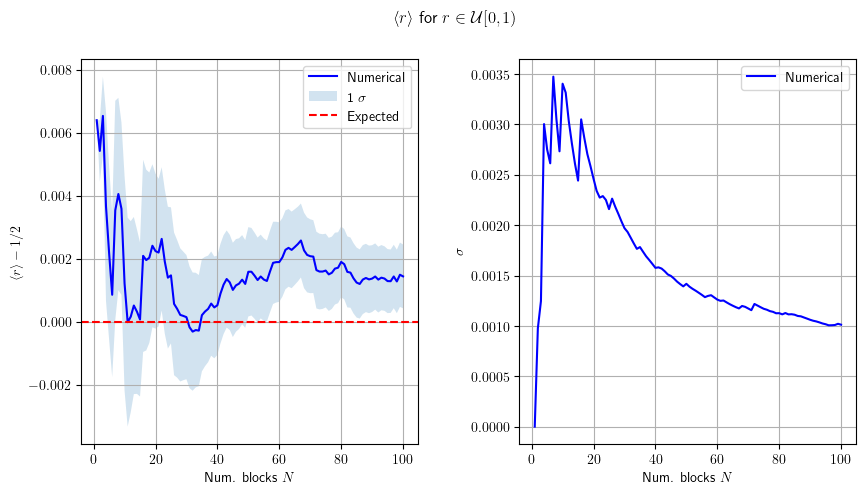

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati da file
data = np.loadtxt("Results_ex_1_1_1.out", skiprows=1)
prog = data[:,0] # Numero progressivo del blocco
ave = data[:,1] # Media cumulativa fino al blocco n-esimo
err = data[:,2] # Incertezza statistica

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('$\\langle r \\rangle$ for $r \\in \\mathcal{U}[0,1)$')

# Grafico di sinistra: medie e incertezze
plt.subplot(1,2,1)
plt.plot(prog, ave, color='blue', label='Numerical') # Medie
plt.fill_between(prog, ave-err, ave+err, alpha=0.2, label='1 $\\sigma$') # Incertezze
plt.axhline(0, color='red', linestyle='--', label='Expected') # Valore atteso

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\langle r \\rangle - 1/2$')
plt.legend()
plt.grid(True)

# Grafico di destra: incertezza
plt.subplot(1,2,2)
plt.plot(prog, err, color='blue', label='Numerical')

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\sigma$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Si calcola ora il valor medio della varianza sulla stima del valor medio di numeri pseduo-casuali generati sull'intervallo $[0,1)$. Questo viene fatto ancora una volta con il metodo della media a blocchi. I risultati numerici sono quindi confrontati con il valore atteso
$$ \sigma^2 = \int_0^1 (r-1/2)^2\, dr = \frac{1}{12} $$

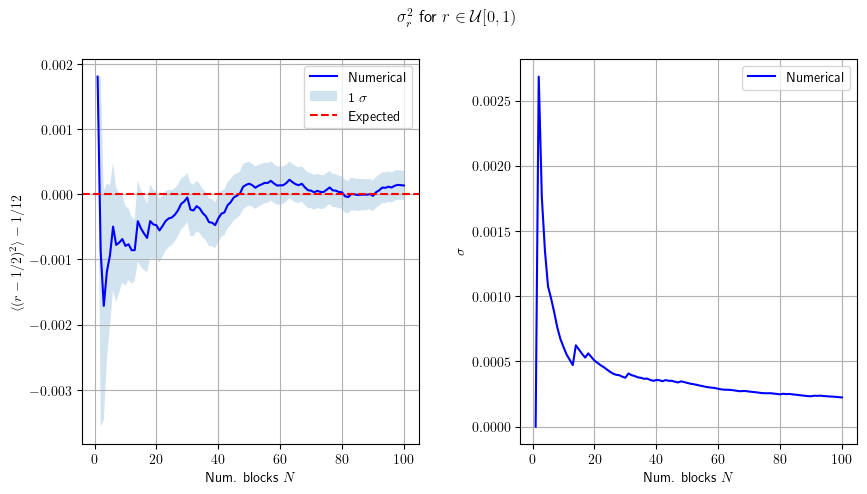

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Carica dati da file
data = np.loadtxt("Results_ex_1_1_2.out", skiprows=1)
prog = data[:,0] # Numero progressivo del blocco
ave = data[:,1] # Media cumulativa fino al blocco n-esimo
err = data[:,2] # Incertezza statistica

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('$\\sigma_r^2$ for $r \\in \\mathcal{U}[0,1)$')

# Grafico di sinistra: medie e incertezze
plt.subplot(1,2,1)
plt.plot(prog, ave, color='blue', label='Numerical') # Medie
plt.fill_between(prog, ave-err, ave+err, alpha=0.2, label='1 $\\sigma$') # Incertezze
plt.axhline(0, color='red', linestyle='--', label='Expected') # Valore atteso

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\langle (r-1/2)^2 \\rangle -1/12$')
plt.legend()
plt.grid(True)

# Grafico di destra: incertezza
plt.subplot(1,2,2)
plt.plot(prog, err, color='blue', label='Numerical')

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\sigma$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Si esegue ora il test statistico di Pearson del chi-quadro per verificare la bontà del generatore di numeri pseudo-casuali.

L'intervallo $[0,1)$ viene suddiviso in $M=100$ sottointervalli. Vengono quindi generati $N=10^4$ numeri pseudo-casuali nello stesso intervallo e si registra il numero di occorrenze in ciascun sottointervallo. Per una distribuzione uniforme, il valore atteso di occorrenze in ciascun sottointervallo è $N/M=100$. La distribuzione del numero di occorrenze $n_i$ nel bin $i$-esimo segue la distribuzione di chi-quadro
$$ \chi^2 = \sum_{i=1}^M \frac{\left( n_i - N/M \right)^2}{N/M} $$
Si vede pertanto che il valore atteso è $\langle \chi^2 \rangle = 100$. Il test è eseguito $10^2$ volte utilizzando un set di $10^4$ numeri pseudo-casuali per ciascuna iterazione.

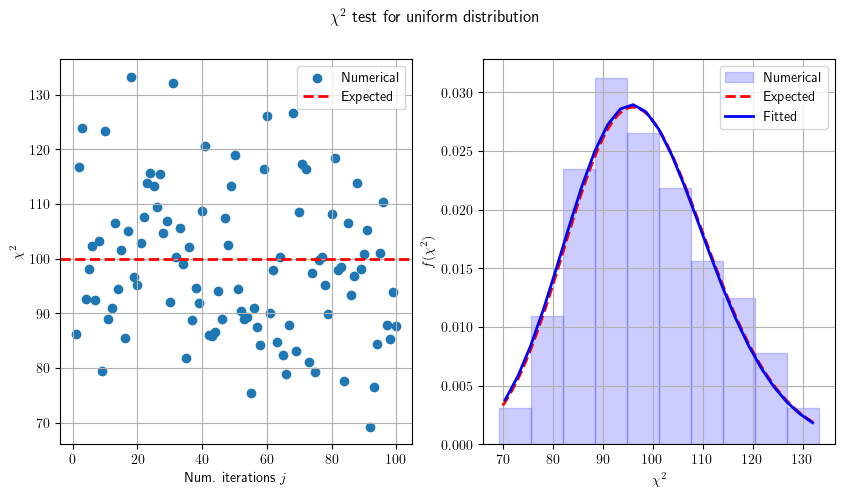

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.optimize import curve_fit

# Carica dati da file
data = np.loadtxt("Results_ex_1_1_3.out", skiprows=1)
num_iter = data[:,0] # Numero di iterazioni
chisquare = data[:,1] # Valore di chi2 calcolato

# Distribuzione chi-square attesa
x = np.arange(70, 133, 1)          
y = chi2.pdf(x, 98)

# Definizione funzione di fit
def chi_square_distribution(x, df, scale):
    return chi2.pdf(x, df)*scale

# Definizione istogramma da fittare
hist, bin_edges = np.histogram(chisquare, bins=25, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit chi-square
params, covariance = curve_fit(chi_square_distribution, bin_centers, hist, p0=[100, 1])
df_fit, scale_fit = params
curve = chi_square_distribution(bin_centers, df_fit, scale_fit)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('$\\chi^2$ test for uniform distribution')

# Grafico di sinistra: chi2 calcolato in funzione del numero di iterazioni
plt.subplot(1,2,1)
plt.scatter(num_iter, chisquare, label='Numerical') # Numerico
plt.axhline(100, color='red', linestyle='--', linewidth=2, label='Expected') # Valore atteso

plt.xlabel('Num. iterations $j$')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid(True)

# Grafico di destra: distribuzione chi2 ottenuta, attesa e fittata
plt.subplot(1,2,2)
plt.hist(chisquare, bins=10, density=True, color='blue', alpha=0.2, edgecolor='blue', label='Numerical')
plt.plot(x, y, linewidth=2, color='red', linestyle='--', label='Expected')
plt.plot(bin_centers, curve, linewidth=2, color='blue', label='Fitted')

plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2)$')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
print("Gdl da fit", params[0], "+/-", np.sqrt(covariance[0,0]))

Gdl da fit 97.72490411195275 +/- 1.3626458870295974


La distribuzione ottenuta è stata normalizzata e fittata con la funzione di densità di probabilità di chi-quadro descritta analiticamente da
$$ f(x) = \frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)} $$
dove $k=100-2=98$ è il numero di gradi di libertà atteso. La distribuzione è stata quindi fittata, ottenendo
$$ k = 97.72 \pm 1.36 $$

## Esercizio 1.2

Oltre alla distribuzione uniforme utilizzata nell'esercizio precedente, vengono ora implementate la distribuzione esponenziale e la distribuzione di Cauchy-Lorentz. Vengono generati numeri pseudo-casuali secondo le tre distribuzioni descritte e ne vengono calcolati i valori medi su blocchi di $N=1,2,10,100$ numeri. Ovvero
$$ S_N = \frac{1}{N}\sum_{i=1}^N x_i $$
detto $x_i$ il singolo numero generato. Al fine di avere un campione di $10^4$ valori di $S_N$ per ciascun valore $N$, vengono generati $10^4,2\cdot10^4,10^5,10^6$ numeri rispettivamente per $N=1,2,10,100$. Si confrontano quindi le quattro distribuzioni ottenute per ciascun tipo di distribuzione, verificando quindi la validità del teorema del limite centrale.

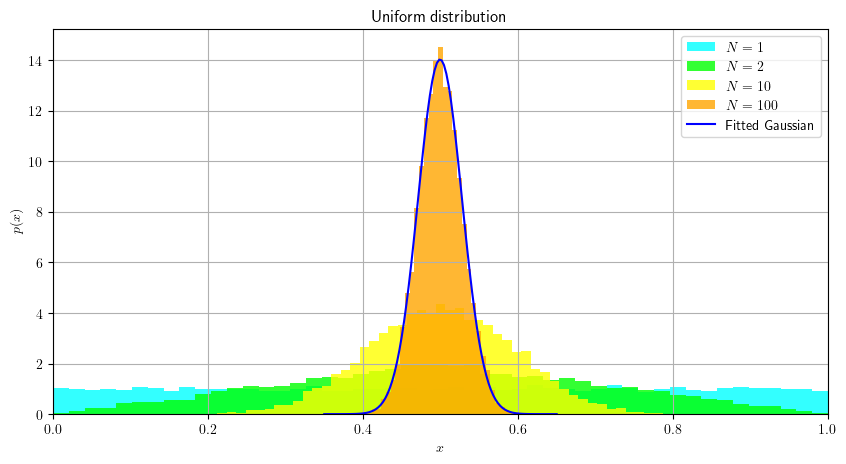

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

# Carico dati da file con valori delle somme S
data = np.loadtxt('Results_ex_1_2_1.out')

# Suddivido i dati in base a N = 1, 2, 10, 100
data1 = data[0:10000] # Primi 10000 dati per N = 1
data2 = data[10001:20000] # Altri 10000 dati per N = 2
data10 = data[20001:30000] # Altri 10000 dati per N = 10
data100 = data[30001:40000] # Altri 10000 dati per N = 100

# Definizione istogramma per fit
hist, bin_edges = np.histogram(data100, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Definizione funzione di fit
def gaussian(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

# Fit gaussiana
params, covariance = curve_fit(gaussian, bin_centers, hist, p0=[0.5, 0.05, 1])
mu_fit, sigma_fit, A_fit = params

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True

# Plot istogrammi dati per N = 1, 2, 10, 100
plt.hist(data1, bins=np.linspace(0, 1, 50), density=True, alpha=0.8, label='$N=1$', color='cyan')
plt.hist(data2, bins=np.linspace(0, 1, 50), density=True, alpha=0.8, label='$N=2$', color='lime')
plt.hist(data10, bins=np.linspace(0.2, 0.8, 50), density=True, alpha=0.8, label='$N=10$', color='yellow')
plt.hist(data100, bins=np.linspace(0.35, 0.65, 50), density=True, alpha=0.8, label='$N=100$', color='orange')

# Plot fit istogramma per N = 100
x_range = np.linspace(0.35, 0.65, 100)
plt.plot(x_range, gaussian(x_range, mu_fit, sigma_fit, A_fit), color='blue', label='Fitted Gaussian')

plt.title('Uniform distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
print("Media da fit", params[0], "+/-", np.sqrt(covariance[0,0]))
print("Dev. stand. da fit", params[1], "+/-", np.sqrt(covariance[1,1]))

Media da fit 0.49947111713185127 +/- 0.0002963280779014819
Dev. stand. da fit 0.028340590134693658 +/- 0.00029634707306471674


Le variabili somma $S_N$ generate a partire dalla distribuzione uniforme $\mathcal{U}[0,1)$ si distribuiscono secondo una distribuzione gaussiana, verificando così il teorema del limite centrale. I parametri ottenuti dal fit sono
$$ \mu = 0.4995 \pm 0.0003 \qquad \sigma = 0.0283 \pm 0.0003 $$
Questo è in accordo con quanto atteso. Infatti, per una distribuzione uniforme $\langle x \rangle=0.5$ e $\sigma_{unif}^2=1/12$. Osserviamo che la media $\mu$ della distribuzione gaussiana coincide con la media delle medie, mentre la deviazione standard $\sigma$ è pari a $\sigma_{unif}/\sqrt{N}=\sqrt{1/12}/\sqrt{100}\approx0.0289$.

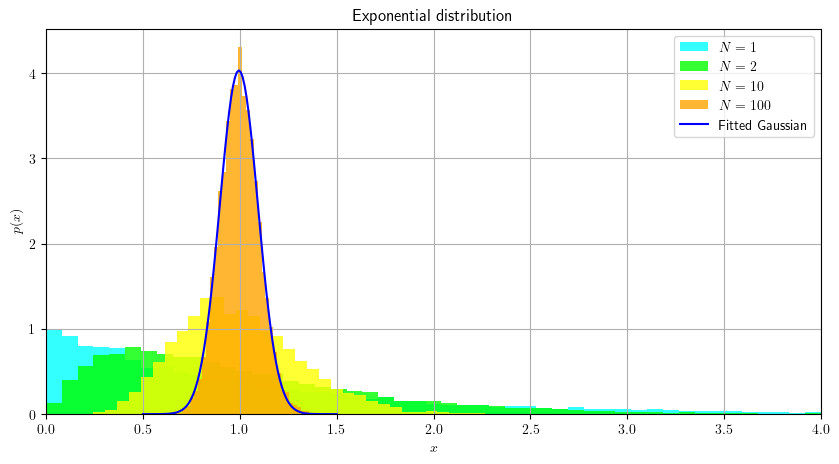

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

# Carico dati da file con valori delle somme S
data = np.loadtxt('Results_ex_1_2_2.out')

# Suddivido i dati in base a N = 1, 2, 10, 100
data1 = data[0:10000] # Primi 10000 dati per N = 1
data2 = data[10001:20000] # Altri 10000 dati per N = 2
data10 = data[20001:30000] # Altri 10000 dati per N = 10
data100 = data[30001:40000] # Altri 10000 dati per N = 100

# Definizione istogramma per fit
hist, bin_edges = np.histogram(data100, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Definizione funzione di fit
def gaussian(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

# Fit gaussiana
params, covariance = curve_fit(gaussian, bin_centers, hist, p0=[1.0, 0.1, 1])
mu_fit, sigma_fit, A_fit = params

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True

# Plot istogrammi dati per N = 1, 2, 10, 100
plt.hist(data1, bins=np.linspace(0, 4, 50), density=True, alpha=0.8, label='$N=1$', color='cyan')
plt.hist(data2, bins=np.linspace(0, 4, 50), density=True, alpha=0.8, label='$N=2$', color='lime')
plt.hist(data10, bins=np.linspace(0, 3, 50), density=True, alpha=0.8, label='$N=10$', color='yellow')
plt.hist(data100, bins=np.linspace(0.5, 1.5, 50), density=True, alpha=0.8, label='$N=100$', color='orange')

# Plot fit istogramma per N = 100
x_range = np.linspace(0.5, 1.5, 100)
plt.plot(x_range, gaussian(x_range, mu_fit, sigma_fit, A_fit), color='blue', label='Fitted Gaussian')

plt.title('Exponential distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim(0, 4)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print("Media da fit", params[0], "+/-", np.sqrt(covariance[0,0]))
print("Dev. stand. da fit", params[1], "+/-", np.sqrt(covariance[1,1]))

Media da fit 0.9952417411548399 +/- 0.0011345503635130647
Dev. stand. da fit 0.09864077336699555 +/- 0.0011346819223097405


Le variabili somma $S_N$ generate a partire dalla distribuzione esponenziale $\lambda e^{-\lambda x}$ per $\lambda=1$ convergono alla distribuzione gaussiana verificando così il teorema del limite centrale. I parametri ottenuti dal fit sono
$$ \mu = 0.9952 \pm 0.0011 \qquad \sigma = 0.0986 \pm 0.0011 $$
Per la distribuzione esponenziale la media e la varianza sono rispettivamente
$$ \langle x \rangle = \int_0^{\infty}xe^{-x}\,dx = 1 $$
$$ \sigma_{exp}^2 = \int_0^{\infty}x^2e^{-x}\,dx - \Big[\int_0^{\infty}xe^{-x}\,dx\Big]^2 = 2-1 = 1$$
Pertanto, i parametri della distribuzione gaussiana sono in accordo con quanto atteso. La media $\mu$ è pari alla media delle medie della distribuzione esponenziale, mentre la deviazione standard $\sigma$ è pari a $\sigma_{exp}/\sqrt{N} = 1/\sqrt{100} = 0.1$.

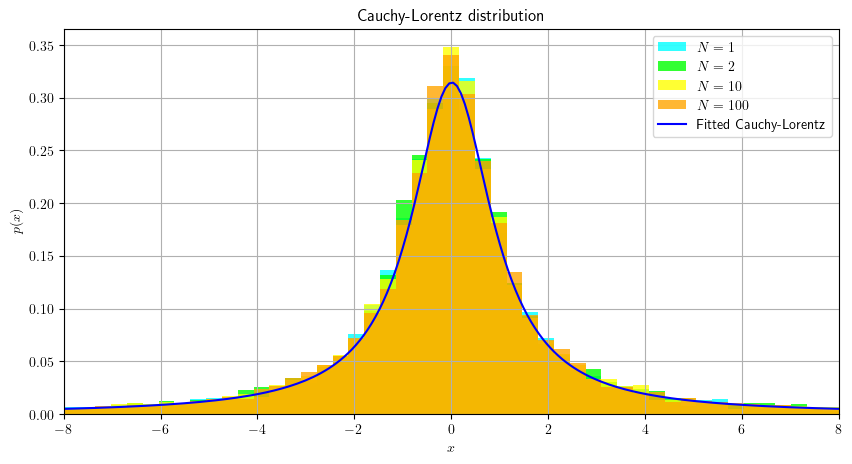

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

# Carico dati da file con valori delle somme S
data = np.loadtxt('Results_ex_1_2_3.out')

# Suddivido i dati in base a N = 1, 2, 10, 100
data1 = data[0:10000] # Primi 10000 dati per N = 1
data2 = data[10001:20000] # Altri 10000 dati per N = 2
data10 = data[20001:30000] # Altri 10000 dati per N = 10
data100 = data[30001:40000] # Altri 10000 dati per N = 100

# Definizione istogramma per fit
hist, bin_edges = np.histogram(data100, bins=1000000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Definizione funzione di fit
def cauchy_distribution(x, mu, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - mu) / gamma)**2))

# Fit Cauchy-Lorentz
params, covariance = curve_fit(cauchy_distribution, bin_centers, hist, p0=[0, 1, 1])
mu_fit, gamma_fit, A_fit = params

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True

# Plot istogrammi dati per N = 1, 2, 10, 100
plt.hist(data1, bins=np.linspace(-8, 8, 50), density=True, alpha=0.8, label='$N=1$', color='cyan')
plt.hist(data2, bins=np.linspace(-8, 8, 50), density=True, alpha=0.8, label='$N=2$', color='lime')
plt.hist(data10, bins=np.linspace(-8, 8, 50), density=True, alpha=0.8, label='$N=10$', color='yellow')
plt.hist(data100, bins=np.linspace(-8, 8, 50), density=True, alpha=0.8, label='$N=100$', color='orange')

# Plot fit istogramma per N = 100
x_range = np.linspace(-8, 8, 200)
plt.plot(x_range, cauchy_distribution(x_range, mu_fit, gamma_fit, A_fit), color='blue', label='Fitted Cauchy-Lorentz')

plt.title('Cauchy-Lorentz distribution')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim(-8, 8)
plt.legend()
plt.grid(True)
plt.show()

In [10]:
print("Media da fit", params[0], "+/-", np.sqrt(covariance[0,0]))
print("Dev. stand. da fit", params[1], "+/-", np.sqrt(covariance[1,1]))

Media da fit 0.013065975563371086 +/- 0.0004900902016013544
Dev. stand. da fit 1.0160624032726109 +/- 0.0006930921821158324


Le variabili somma $S_N$ generate a partire dalla distribuzione di Cauchy-Lorentz
$$ p(x) = \frac{1}{\pi}\frac{\gamma}{(x-\mu)^2+\gamma^2} $$
per $\gamma=1$ verificano il teorema del limite centrale convergendo alla distribuzione di Cauchy-Lorentz con parametri
$$ \mu = 0.0131 \pm 0.0005 \qquad \gamma = 1.0161 \pm 0.0007 $$
Questi sono in accordo con i valori attesi di $\mu=0$ e $\gamma=1$ (anche se quelli ottenuti dal fit non sono propriamente in accordo, ma questa è una conseguenza del fit poco accurato).

## Esercizio 1.3

Nel seguente esercizio viene simulato l'esperimento di Buffon per la valutazione di $\pi$. 

Per realizzare la simulazione si sono posti i seguenti parametri per la distanza tra i fili $d$ e la lunghezza dell'ago $L$
$$ d = 1 [a.u.] \qquad L=0.75 [a.u.] $$

Scegliamo di porre il filo in $x=0$. Le coordinate corrispondenti al centro dell'ago sono generate a partire da una distribuzione uniforme come
$$ x_{CM} \in \mathcal{U}[-d/2,+d/2) \qquad y_{CM}=0 $$

A questo punto si simula l'angolo di inclinazione dell'ago con un metodo di accept/reject. In particolare, si genera la coppia di coordinate $(x_{ang},y_{ang})$ a partire da una ditribuzione uniforme nel quadrato di lato $L$ centrato in $(x_{CM},y_{CM})$, ovvero generando 
$$ x_{ang} \in \mathcal{U}[x_{CM}-L/2,x_{CM}+L/2) \qquad y_{ang} \in \mathcal{U}[-L/2,L/2) $$
Se $\text{dist}(CM,ang)<L/2$ (ovvero il punto è nel cerchio inscritto nel quadrato), allora l'angolo viene accettato, viceversa scartato.

La procedura è ripetuta fino a realizzare $10^2$ blocchi con $10^4$ angoli ciascuno.

Si calcola quindi il coseno dell'angolo così generato e si calcolano le coordinate degli estremi dell'ago. Se almeno una di queste ha ascissa di segno opposto rispetto a $x_{CM}$, allora l'ago interseca il filo in $x=0$ e viene incrementata la variabile $N_{hit}$ che conta il numero di intersezioni.

Detto $N_{thr}=10^4$ il numero complessivo di lanci per blocco, si ottiene la stima di $\pi$ da
$$\pi = \frac{2L}{Pd} = \frac{2LN_{thr}}{N_{hit}d}$$ 

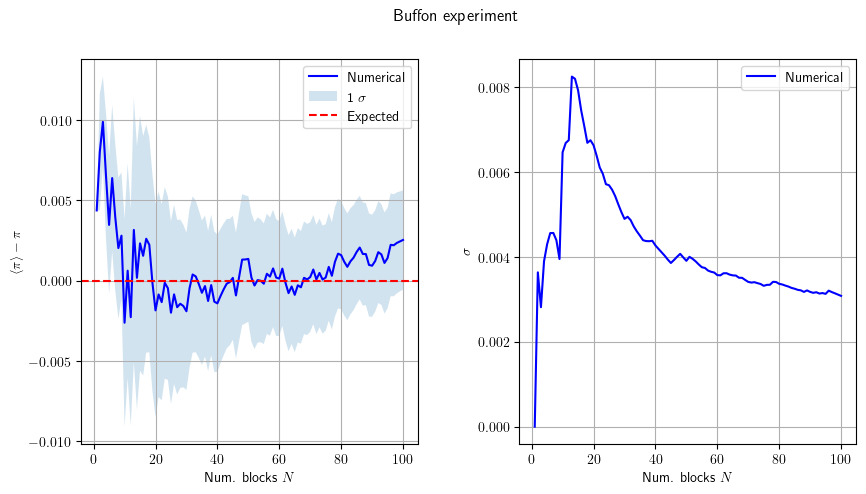

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Carico dati da file: numero progressivo, media e incertezza statistica
data = np.loadtxt("Results_ex_1_3.out", skiprows=1)
prog = data[:,0] # Numero progressivo del blocco
ave = data[:,1] # Media
err = data[:,2] # Incertezza statistica

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Buffon experiment')

# Grafico di sinistra: medie e incertezze
plt.subplot(1,2,1)
plt.plot(prog, ave, color='blue', label='Numerical') # Medie
plt.fill_between(prog, ave-err, ave+err, alpha=0.2, label='1 $\\sigma$') # incertezze
plt.axhline(0, color='red', linestyle='--', label='Expected') # Valore atteso

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\langle \\pi \\rangle - \\pi$')
plt.legend()
plt.grid(True)

# Grafico di destra: incertezza
plt.subplot(1,2,2)
plt.plot(prog, err, color='blue', label='Numerical')

plt.xlabel('Num. blocks $N$')
plt.ylabel('$\\sigma$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()